#### Import required libraries 

In [1]:
import pandas as pd
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn

#### Reading the data from the csv file

In [2]:
data = pd.read_csv("VARK_analysis_data2.csv")
data.head()

,Name,Roll number,Gender,Visual,Aural,Reading,Kinesthetic,SGPA,Classification
0,NaN,21201,F,11,8,9,14,8.955,0
1,NaN,21202,F,13,15,4,16,9.409,1
2,NaN,21204,F,10,12,13,13,6.818,0
3,NaN,21205,F,16,15,6,15,8.818,0
4,NaN,21206,M,1,5,4,8,0.000,0


#### Dropping columns name, roll number and SGPA

In [3]:
data = data.drop(['Name','Roll number','SGPA'],axis=1)
data.head()

,Gender,Visual,Aural,Reading,Kinesthetic,Classification
0,F,11,8,9,14,0
1,F,13,15,4,16,1
2,F,10,12,13,13,0
3,F,16,15,6,15,0
4,M,1,5,4,8,0


## 1. Visualizing the data 

In [4]:
# Range of scores for V,A,R,K
# Number of males, no of females
# Scatter plot betwwen V,A,R,K and CGPA (?)
# Number of people who got more than a 9 CGPA 


In [5]:
dataTypeSeries = data.dtypes
print(dataTypeSeries)

Gender            object
Visual             int64
Aural              int64
Reading            int64
Kinesthetic        int64
Classification     int64
dtype: object


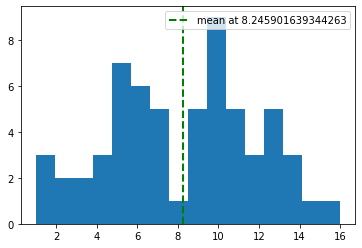

In [6]:
V = (pd.DataFrame(data.iloc[:,[1]])).to_numpy()
plt.hist(V,bins=16)
measurements = [np.mean(V)]
names = ["mean"]
colors = ['green']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.0, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()
plt.show()

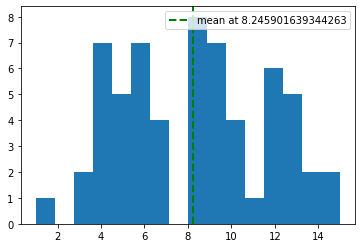

In [7]:
A = (pd.DataFrame(data.iloc[:,[2]])).to_numpy()
plt.hist(A,bins=16)
measurements = [np.mean(A)]
names = ["mean"]
colors = ['green']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.0, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()
plt.show()

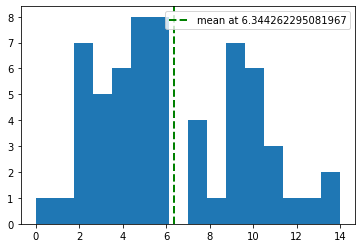

In [8]:
R = (pd.DataFrame(data.iloc[:,[3]])).to_numpy()
plt.hist(R,bins=16)
measurements = [np.mean(R)]
names = ["mean"]
colors = ['green']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.0, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()
plt.show()

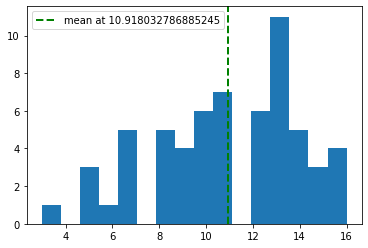

In [9]:
K = (pd.DataFrame(data.iloc[:,[4]])).to_numpy()
plt.hist(K,bins=16)
measurements = [np.mean(K)]
names = ["mean"]
colors = ['green']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.0, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()
plt.show()

## 2. Preprocessing

#### Replacing F and M with 1 and 0 respectively

In [10]:
data['Gender'].replace('F', 1,inplace=True)
data['Gender'].replace('M', 0,inplace=True)
data.head()

,Gender,Visual,Aural,Reading,Kinesthetic,Classification
0,1,11,8,9,14,0
1,1,13,15,4,16,1
2,1,10,12,13,13,0
3,1,16,15,6,15,0
4,0,1,5,4,8,0


#### Normalizing the data 

In [11]:
X_temp = data.iloc[:,[0,1,2,3,4]] 
X_temp = preprocessing.normalize(X_temp)
y_temp = data.iloc[:,5]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_temp,y_temp,test_size=0.30)

In [13]:
def calculateAccuracy(model):  
    y_pred = model.predict(X_test)
    y_pred = (pd.DataFrame(y_pred)).to_numpy()
    y_tes = (pd.DataFrame(y_test)).to_numpy()
    TP = FP = TN = FN = 0
    for i in range(0,len(y_pred)):
        if(y_pred[i] == 1 and y_tes[i] == 1):
            TP = TP + 1
        elif(y_pred[i] == 1 and y_tes[i] == 0):
            FP = FP + 1
        elif(y_pred[i] == 0 and y_tes[i] == 1):
            FN = FN + 1
        elif(y_pred[i] == 0 and y_tes[i] == 0):
            TN = TN + 1

    precision = TP/(TP + FP)
    recall =  TP/(TP + FN)
    F1 = (2*precision*recall)/(precision+recall)
    print("Precision = ",precision)
    print("Recall = ",recall)
    print("F1 = ",F1)

In [14]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)
#calculateAccuracy(model1)

0.47368421052631576

In [15]:
model2 = SVC(kernel='rbf')
model2.fit(X_train,y_train)
model2.score(X_test,y_test)
#calculateAccuracy(model2)

0.5263157894736842

In [16]:
model3 = KNeighborsClassifier(n_neighbors=2)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)
#calculateAccuracy(model3)

0.5263157894736842